In [54]:
import os
os.environ["CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [55]:
def installed_data():
  from pycaret import show_versions
  show_versions()

try:
  installed_data()
except ModuleNotFoundError:
  !pip install pycaret
  installed_data()


System:
    python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-5.15.109+-x86_64-with-glibc2.35

PyCaret required dependencies:
                 pip: 23.1.2
          setuptools: 67.7.2
             pycaret: 3.0.4
             IPython: 7.34.0
          ipywidgets: 7.7.1
                tqdm: 4.66.1
               numpy: 1.23.5
              pandas: 1.5.3
              jinja2: 3.1.2
               scipy: 1.10.1
              joblib: 1.3.2
             sklearn: 1.2.2
                pyod: 1.1.0
            imblearn: 0.10.1
   category_encoders: 2.6.2
            lightgbm: 4.0.0
               numba: 0.56.4
            requests: 2.31.0
          matplotlib: 3.7.1
          scikitplot: 0.3.7
         yellowbrick: 1.5
              plotly: 5.15.0
    plotly-resampler: Not installed
             kaleido: 0.2.1
           schemdraw: 0.15
         statsmodels: 0.14.0
              sktime: 0.22.0
               tbats: 1.1.3
            pmda

In [56]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_timeseries_sales_dataset.csv to synthetic_timeseries_sales_dataset (2).csv


In [58]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [59]:
sale_data = get_data('synthetic_timeseries_sales_dataset', verbose=False)

In [60]:
fh=10
fold=3

In [61]:
fig_kwargs={
    'renderer':'png',
    'width': 1600,
    'height':600
}

## Exploratory Database

In [62]:
eda_sales = TSForecastingExperiment()
y = sale_data["Sales"]
eda_sales.setup(data = y , fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,6367
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(731, 1)"
5,Transformed data shape,"(731, 1)"
6,Transformed train set shape,"(721, 1)"
7,Transformed test set shape,"(10, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


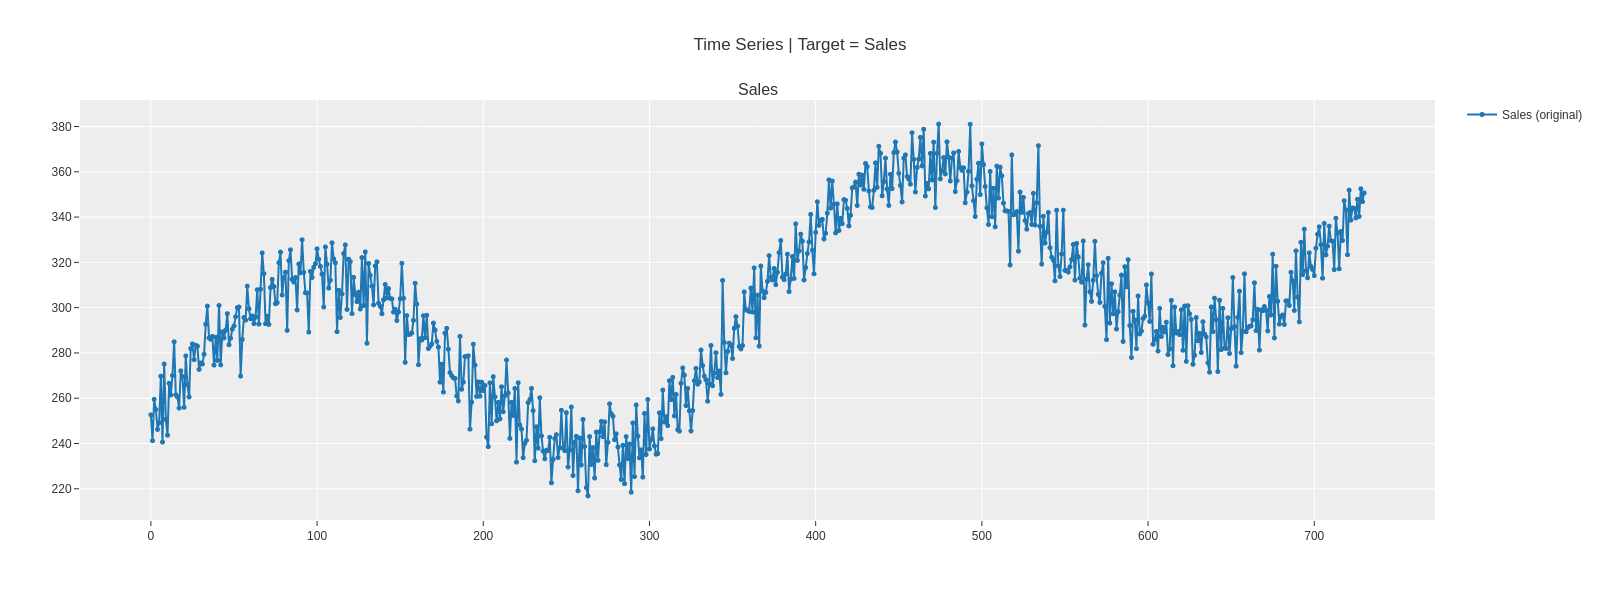

In [63]:
eda_sales.plot_model()

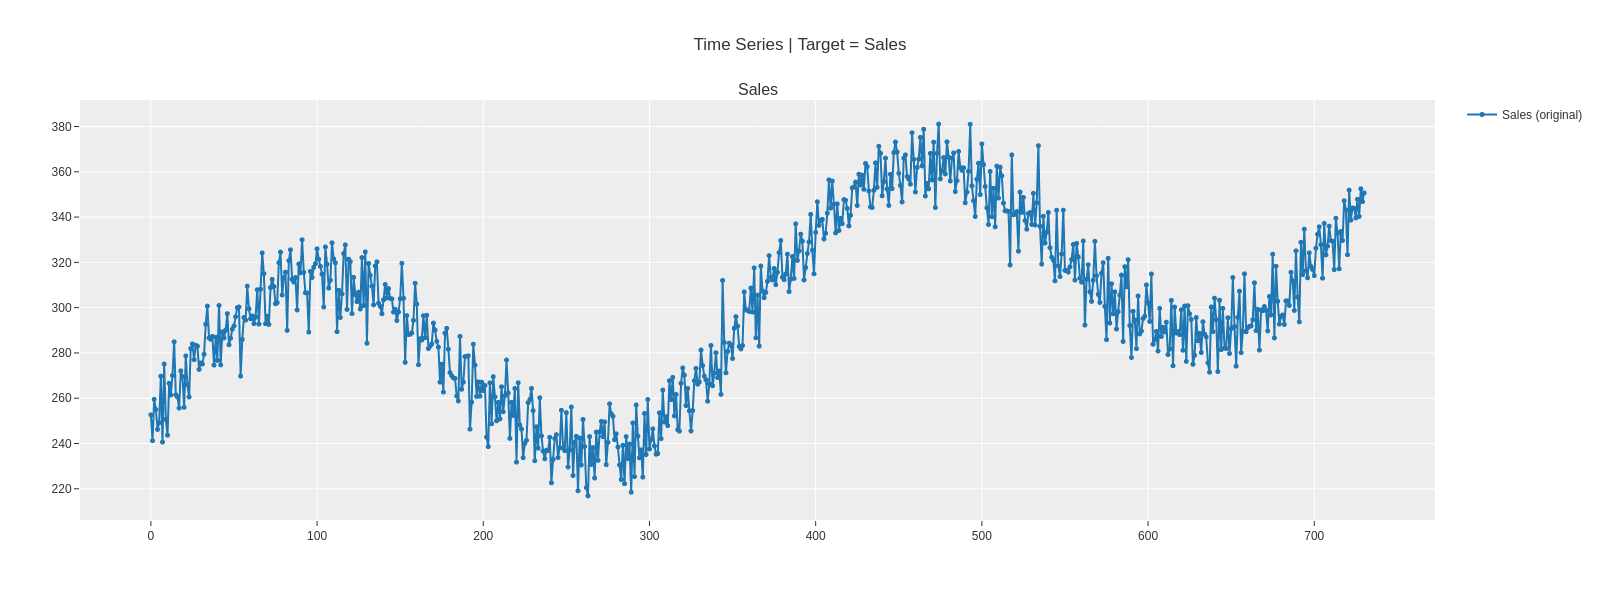

In [65]:
eda_sales.plot_model(data_kwargs={'plot_datatype': ["original", "imputed", "transformed"]})

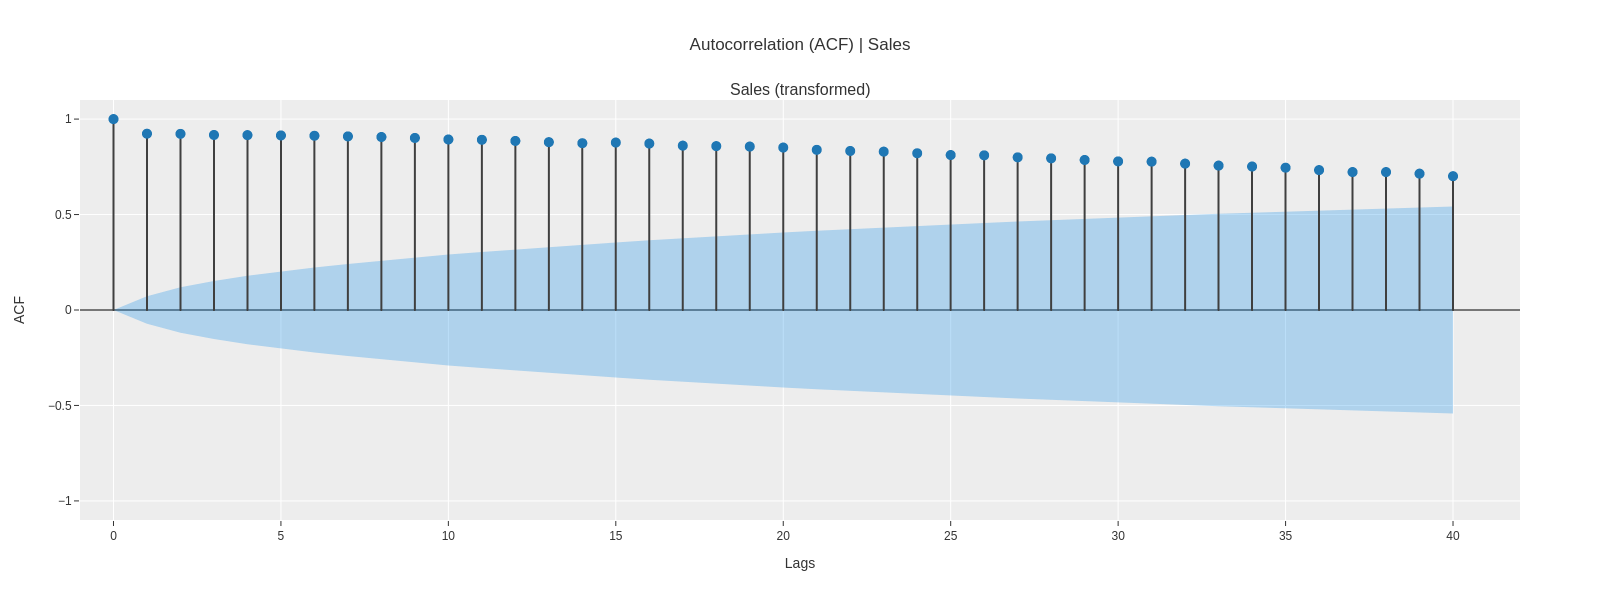

In [45]:
eda_sales.plot_model(plot='acf')

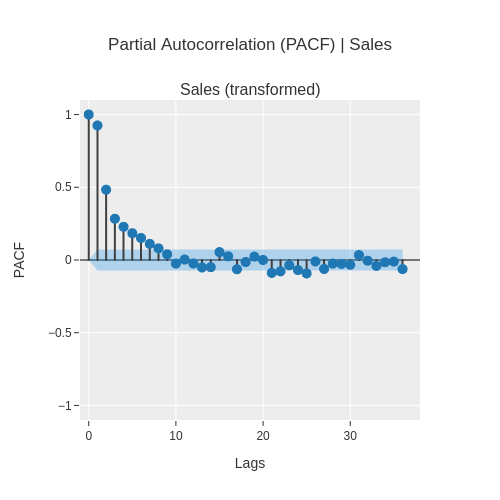

In [46]:
eda_sales.plot_model(plot='pacf', data_kwargs={'nlags':36}, fig_kwargs={'height':500, 'width':500})

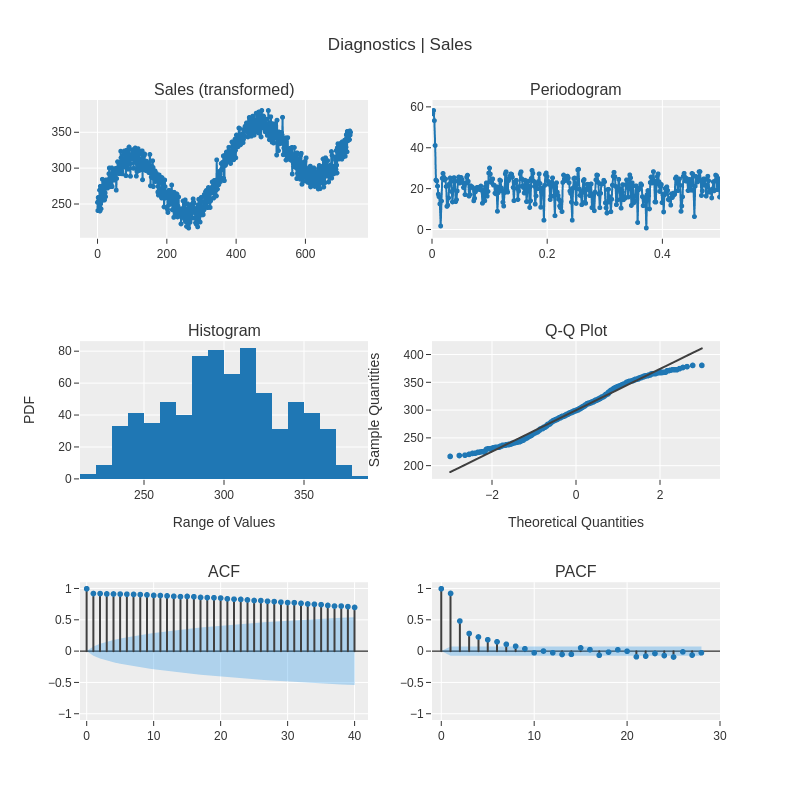

In [49]:
eda_sales.plot_model(plot="diagnostics", fig_kwargs={"height":800, "width":800})

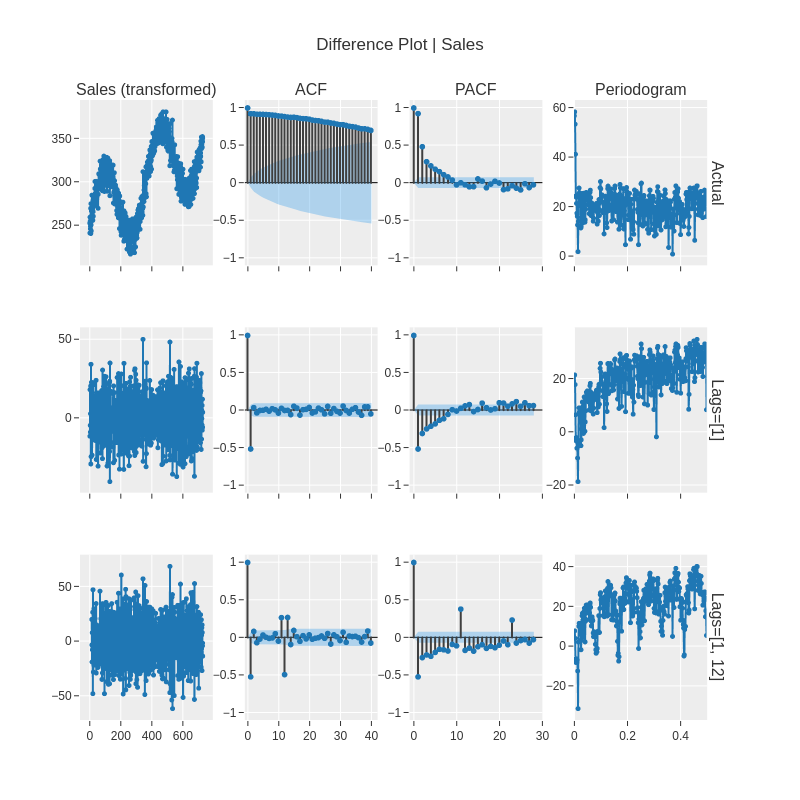

In [66]:
eda_sales.plot_model(
    plot="diff",
    data_kwargs={"lags_list": [[1], [1, 12]], "acf": True, "pacf": True, "periodogram": True},
    fig_kwargs={"height": 800, "width": 800}
)

## Statistical tests

In [72]:
eda_sales.check_stats(test="summary")

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,731.000000
1,Summary,Statistics,Transformed,# Missing Values,,0.000000
2,Summary,Statistics,Transformed,Mean,,300.154642
3,Summary,Statistics,Transformed,Median,,299.672568
4,Summary,Statistics,Transformed,Standard Deviation,,37.263696
5,Summary,Statistics,Transformed,Variance,,1388.583022
6,Summary,Statistics,Transformed,Kurtosis,,-0.729721
7,Summary,Statistics,Transformed,Skewness,,-0.037378
8,Summary,Statistics,Transformed,# Distinct Values,,731.000000


In [73]:
eda_sales.check_stats(test='stationarity')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Transformed,Stationarity,{'alpha': 0.05},False
1,Stationarity,ADF,Transformed,p-value,{'alpha': 0.05},0.768228
2,Stationarity,ADF,Transformed,Test Statistic,{'alpha': 0.05},-0.958128
3,Stationarity,ADF,Transformed,Critical Value 1%,{'alpha': 0.05},-3.439427
4,Stationarity,ADF,Transformed,Critical Value 5%,{'alpha': 0.05},-2.865546
5,Stationarity,ADF,Transformed,Critical Value 10%,{'alpha': 0.05},-2.568903
6,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.05},False
7,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.05},0.01
8,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.05},0.334538
9,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.05},0.119


In [75]:
eda_sales.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,731.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,300.154642
3,Summary,Statistics,Transformed,Median,,299.672568
4,Summary,Statistics,Transformed,Standard Deviation,,37.263696
5,Summary,Statistics,Transformed,Variance,,1388.583022
6,Summary,Statistics,Transformed,Kurtosis,,-0.729721
7,Summary,Statistics,Transformed,Skewness,,-0.037378
8,Summary,Statistics,Transformed,# Distinct Values,,731.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",13901.840871


## Available models

In [77]:
exp_sales = TSForecastingExperiment()
exp_sales.setup(data=y, fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,6296
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(731, 1)"
5,Transformed data shape,"(731, 1)"
6,Transformed train set shape,"(721, 1)"
7,Transformed test set shape,"(10, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [78]:
exp_sales.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
croston,Croston,sktime.forecasting.croston.Croston,True


## Modeling (manually)

In [79]:
exp_sales = TSForecastingExperiment()
exp_sales.setup(data=y, fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,907
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(731, 1)"
5,Transformed data shape,"(731, 1)"
6,Transformed train set shape,"(721, 1)"
7,Transformed test set shape,"(10, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [81]:
model_sales = exp_sales.create_model("arima", order=(1,1,0), seasonal_order=(0,1,0,12))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,690.0000,1.1914,1.2572,13.6715,18.0986,0.0422,0.0438,-2.0518
1,700.0000,0.8455,0.9049,9.7121,13.0449,0.0295,0.0298,-2.5919
2,710.0000,0.7726,0.8440,8.8607,12.1380,0.0272,0.0266,-0.5535
Mean,nan,0.9365,1.0020,10.7481,14.4272,0.0330,0.0334,-1.7324
SD,nan,0.1827,0.1822,2.0962,2.6224,0.0066,0.0074,0.8623


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

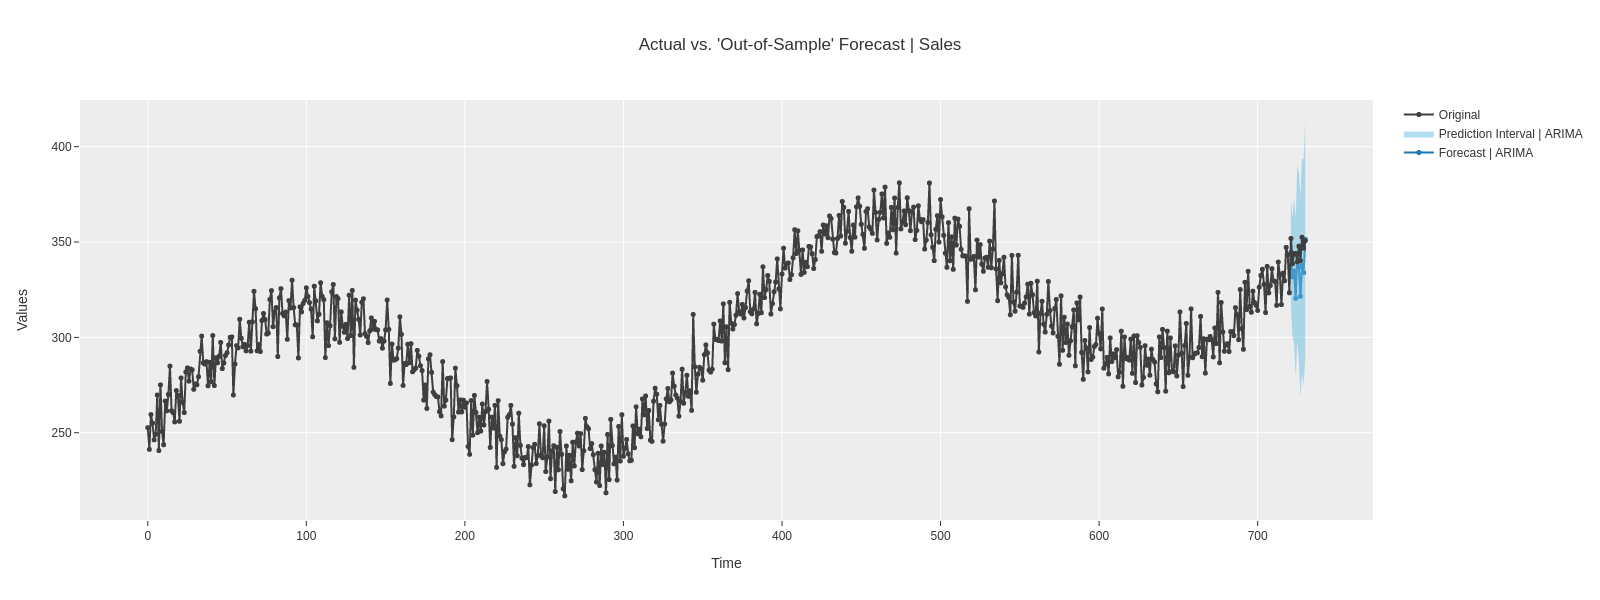

In [82]:
exp_sales.plot_model(estimator=model_sales)

In [83]:
exp_sales.check_stats(model_sales)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,720.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,-0.148373
3,Summary,Statistics,Residual,Median,,0.222118
4,Summary,Statistics,Residual,Standard Deviation,,18.020396
5,Summary,Statistics,Residual,Variance,,324.734669
6,Summary,Statistics,Residual,Kurtosis,,3.579214
7,Summary,Statistics,Residual,Skewness,,-0.467569
8,Summary,Statistics,Residual,# Distinct Values,,720.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",270.972253


## Observations

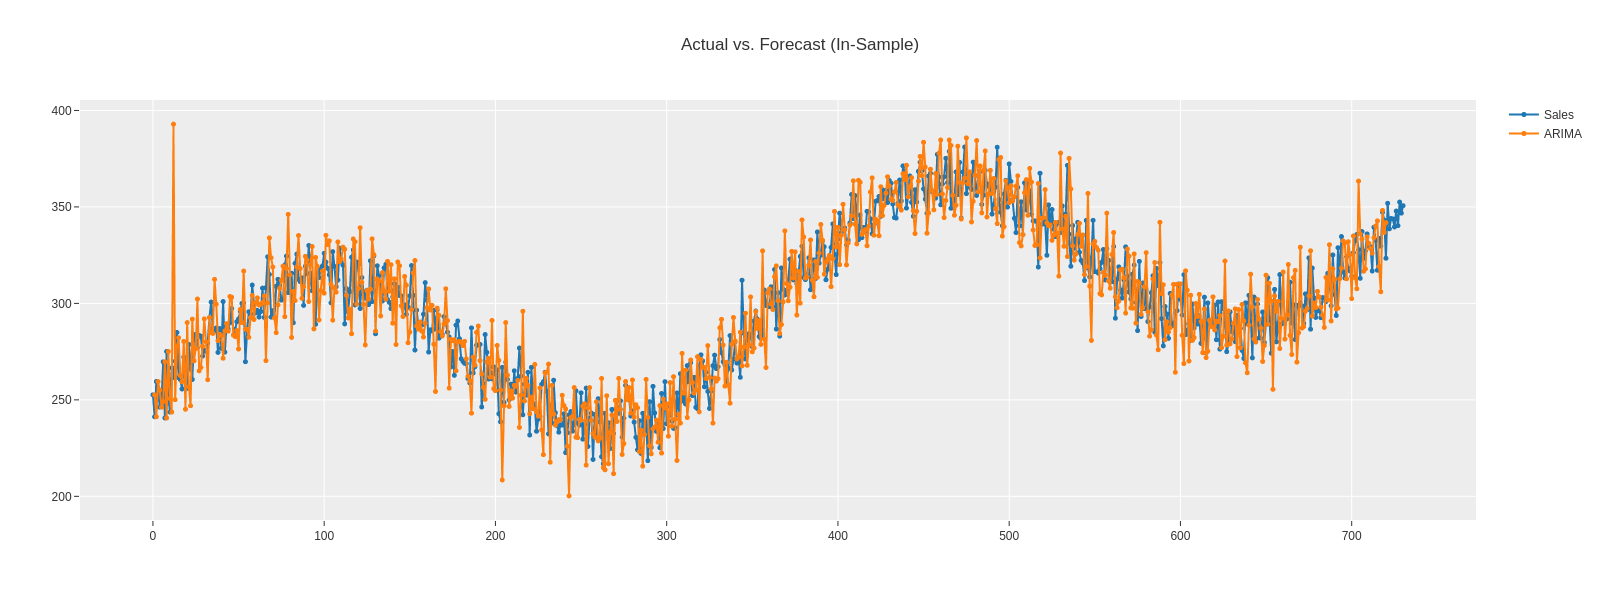

In [84]:
exp_sales.plot_model(model_sales, plot='insample')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,690.0000,0.9249,0.9200,10.6141,13.2440,0.0332,0.0337,-0.6342
1,700.0000,1.1075,0.9576,12.7223,13.8040,0.0384,0.0392,-3.0221
2,710.0000,0.6780,0.6676,7.7750,9.6019,0.0234,0.0235,0.0279
Mean,nan,0.9035,0.8484,10.3705,12.2166,0.0317,0.0321,-1.2095
SD,nan,0.1760,0.1287,2.0271,1.8630,0.0062,0.0065,1.3099


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished


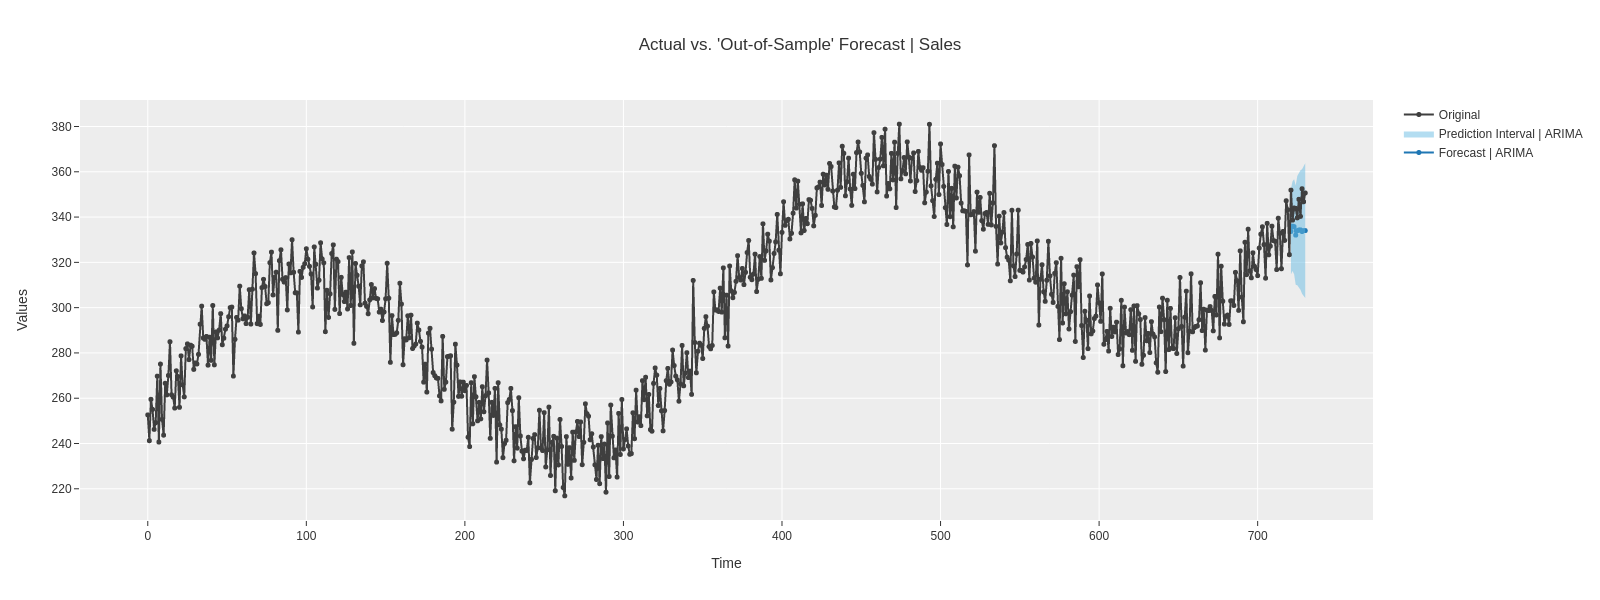

In [86]:
tuned_sales_model = exp_sales.tune_model(model_sales)
exp_sales.plot_model(estimator=tuned_model)

In [87]:
print(model_sales)
print(tuned_sales_model)

ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))
ARIMA(order=(1, 1, 0), seasonal_order=(1, 0, 0, 2), with_intercept=False)


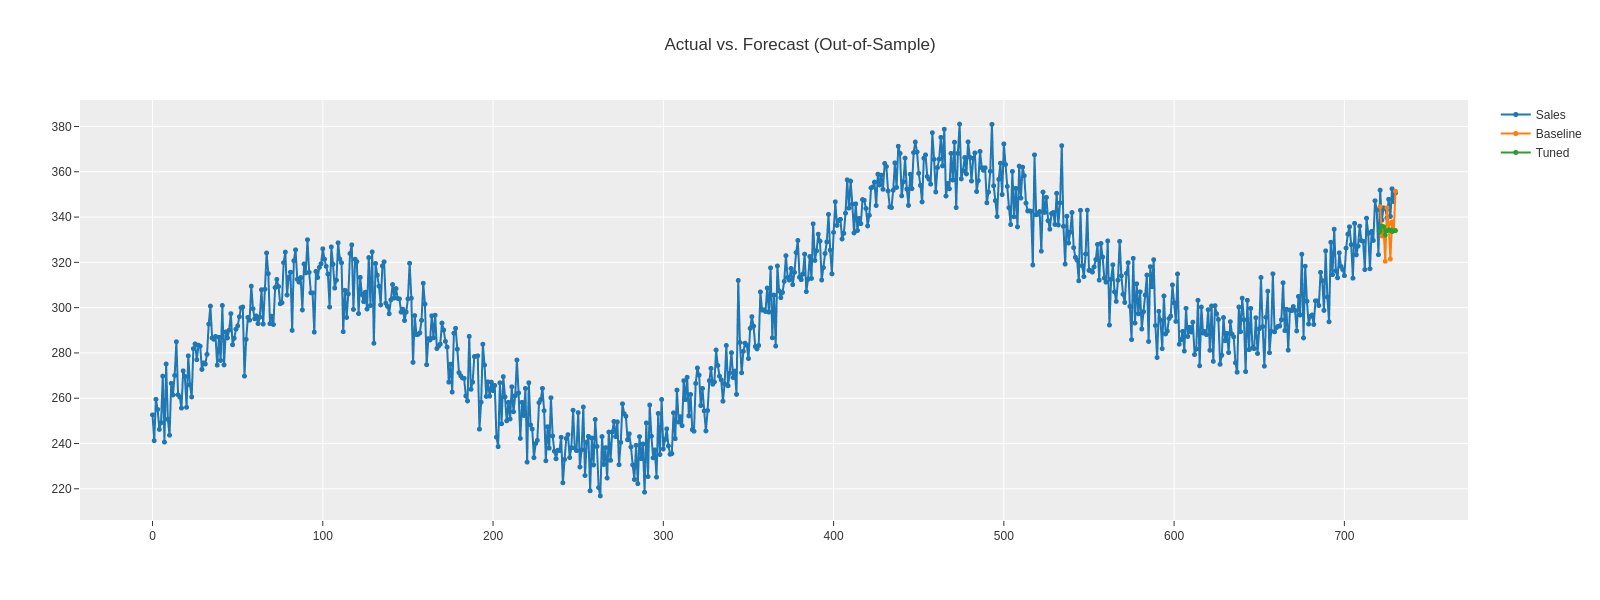

In [88]:
exp_sales.plot_model([model_sales, tuned_sales_model], data_kwargs={"labels": ["Baseline", "Tuned"]})

## Getting ready to deploy

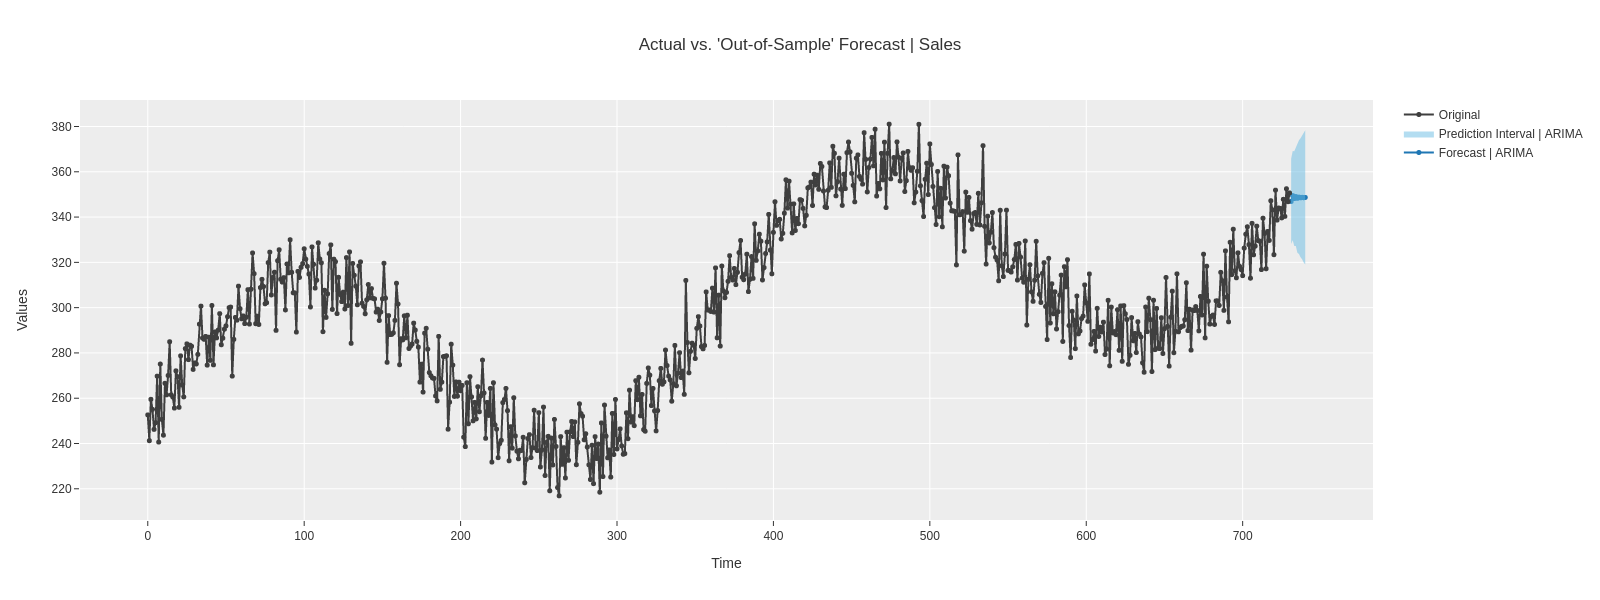

,y_pred
731,346.8988
732,349.4950
733,348.1689
734,349.0683
735,348.2632
736,348.8199
737,348.5156
738,348.7226
739,348.5485
740,348.6687


In [94]:
final_model = exp_sales.finalize_model(tuned_sales_model)
exp_sales.plot_model(final_model)
exp_sales.predict_model(final_model)

In [95]:
print(tuned_sales_model)
print(final_model)

ARIMA(order=(1, 1, 0), seasonal_order=(1, 0, 0, 2), with_intercept=False)
ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ARIMA(order=(1,
                                                                             1,
                                                                             0),
                                                                      seasonal_order=(1,
                                                                                      0,
                                                                                      0,
                                                                                      2),
                                                                      with_intercept=False))]))])


In [97]:
_ = exp_sales.save_model(final_model, "final_sales_model")


Transformation Pipeline and Model Successfully Saved


In [98]:
exp_load = TSForecastingExperiment()
loaded_sales_model = exp_load.load_model("final_sales_model")

Transformation Pipeline and Model Successfully Loaded


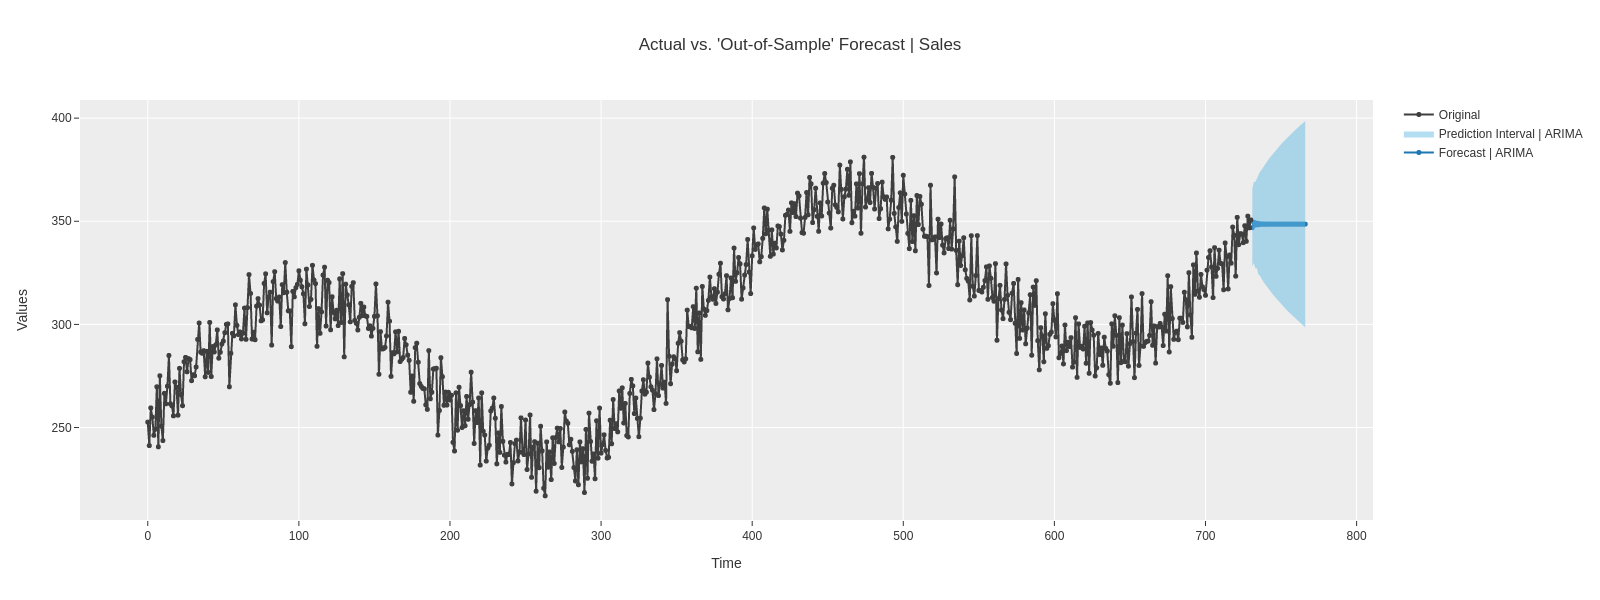

In [99]:
exp_sales.plot_model(estimator=final_model, data_kwargs={'fh': 36})